In [1]:
import matplotlib.pyplot as plt
import numpy as np

import GWPhotonCounting

from jax.scipy.special import logsumexp

from scipy.interpolate import interp1d
from jax.lax import cumlogsumexp

/home/ethan.payne/code_libraries/bilby/bilby/gw/detector/geometry.py:5: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import ROT_DAY, DAYJUL_SI
/home/ethan.payne/.conda/envs/ve310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from copy import copy
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'axes.titlesize':12,
   'text.usetex': True,
   'font.family':'serif',
   'font.serif':'Computer Modern'
   }
matplotlib.rcParams.update(params)
matplotlib.rcParams["font.serif"] = "Computer Modern Roman"
matplotlib.rcParams["font.family"] = "Serif"
matplotlib.rcParams['text.latex.preamble'] = r'\renewcommand{\mathdefault}[1][]{}'

from matplotlib.markers import MarkerStyle
import matplotlib as mpl

In [3]:
import glob, json
from tqdm import tqdm 

from scipy.signal import savgol_filter
sg_poly = 2
sg_nodes = 5


Nevents = 10000

loglikelihoods = []
loglikelihoods_0d1 = []
loglikelihoods_strain = []
loglikelihoods_strain_15db = []

loglikelihoods_margA = []
loglikelihoods_0d1_margA = []
loglikelihoods_strain_margA = []
loglikelihoods_strain_15db_margA = []

signal_photons = []
noise_photons = []
noise_photons_0d1 = []
snrs = []
snrs_silica = []
indices = []

file_list = glob.glob("results_250520/result_CE_*.json")


R1d6s_interp = np.linspace(9,15,1000)
R1d6s = np.linspace(9,15,100)

for i in tqdm(range(len(file_list[:Nevents]))):
    file = file_list[i] #f'results_250410/result_CE1CE2silica_{10900 + i}.json'
    indices.append(int(file.split("_")[-1].split(".")[0]))
    with open(file, "r") as f:
        result = json.load(f)

    loglikelihoods.append(interp1d(R1d6s, savgol_filter(result["logls"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp))
    loglikelihoods_0d1.append(interp1d(R1d6s, savgol_filter(result["logls_0d1"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp))
    loglikelihoods_margA.append(interp1d(R1d6s, savgol_filter(result["logls_margA"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp))
    loglikelihoods_0d1_margA.append(interp1d(R1d6s, savgol_filter(result["logls_margA_0d1"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp))

    loglikelihoods_strain.append(interp1d(R1d6s, savgol_filter(result["logls_strain"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp))
    loglikelihoods_strain_15db.append(interp1d(R1d6s, savgol_filter(result["logls_strain_15db"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp))
    loglikelihoods_strain_margA.append(interp1d(R1d6s, savgol_filter(result["logls_margA_strain"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp))
    loglikelihoods_strain_15db_margA.append(interp1d(R1d6s, savgol_filter(result["logls_margA_strain_15db"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp))

    
    signal_photons.append(result["n_signal_photons"])
    noise_photons.append(result["n_noise_photons"])
    noise_photons_0d1.append(result["n_noise_photons_0d1"])
    snrs.append(result["snr"])
    snrs_silica.append(result["snr_sqz"])

loglikelihoods = np.array(loglikelihoods)
loglikelihoods_0d1 = np.array(loglikelihoods_0d1)
loglikelihoods_margA = np.array(loglikelihoods_margA)
loglikelihoods_0d1_margA = np.array(loglikelihoods_0d1_margA)

loglikelihoods_strain = np.array(loglikelihoods_strain)
loglikelihoods_strain_15db = np.array(loglikelihoods_strain_15db)
loglikelihoods_strain_margA = np.array(loglikelihoods_strain_margA)
loglikelihoods_strain_15db_margA = np.array(loglikelihoods_strain_15db_margA)

signal_photons = np.array(signal_photons)
noise_photons = np.array(noise_photons)
noise_photons_0d1 = np.array(noise_photons_0d1)
snrs = np.array(snrs)
snrs_silica = np.array(snrs_silica)


100%|██████████| 8608/8608 [06:04<00:00, 23.60it/s]


In [4]:
Nevents = len(loglikelihoods)

In [5]:
np.sum(signal_photons), np.sum(noise_photons), np.sum(noise_photons_0d1)

(4.0, 882.0, 102.0)

In [6]:
print(np.sqrt(np.sum(snrs**2)), np.sqrt(np.sum(snrs_silica**2)))
print(np.mean(snrs), np.mean(snrs_silica))
print(np.median(snrs), np.median(snrs_silica))


9.831496748208632 24.691870890833485
0.07524089510168286 0.18761431716819452
0.05337693539188676 0.1316574859932212


In [7]:
prob_pc = np.exp(np.sum(loglikelihoods, axis=0) - np.max(np.sum(loglikelihoods, axis=0)))
prob_pc /= np.sum(prob_pc)*(R1d6s[1]-R1d6s[0])

prob_pc_0d1 = np.exp(np.sum(loglikelihoods_0d1, axis=0) - np.max(np.sum(loglikelihoods_0d1, axis=0)))
prob_pc_0d1 /= np.sum(prob_pc_0d1)*(R1d6s[1]-R1d6s[0])

prob_pc_margA = np.exp(np.sum(loglikelihoods_margA, axis=0) - np.max(np.sum(loglikelihoods_margA, axis=0)))
prob_pc_margA /= np.sum(prob_pc_margA)*(R1d6s[1]-R1d6s[0])

prob_pc_0d1_margA = np.exp(np.sum(loglikelihoods_0d1_margA, axis=0) - np.max(np.sum(loglikelihoods_0d1_margA, axis=0)))
prob_pc_0d1_margA /= np.sum(prob_pc_0d1_margA)*(R1d6s[1]-R1d6s[0])

log_prob_strain = np.sum(loglikelihoods_strain, axis=0) - np.max(np.sum(loglikelihoods_strain, axis=0))
prob_strain = np.exp(log_prob_strain)
prob_strain /= np.sum(prob_strain)*(R1d6s[1]-R1d6s[0])

log_prob_strain_15db = np.sum(loglikelihoods_strain_15db, axis=0) - np.max(np.sum(loglikelihoods_strain_15db, axis=0))
prob_strain_15db = np.exp(log_prob_strain_15db)
prob_strain_15db /= np.sum(prob_strain_15db)*(R1d6s[1]-R1d6s[0])

log_prob_strain_margA = np.sum(loglikelihoods_strain_margA, axis=0) - np.max(np.sum(loglikelihoods_strain_margA, axis=0))
prob_strain_margA = np.exp(log_prob_strain_margA)
prob_strain_margA /= np.sum(prob_strain_margA)*(R1d6s[1]-R1d6s[0])

log_prob_strain_15db_margA = np.sum(loglikelihoods_strain_15db_margA, axis=0) - np.max(np.sum(loglikelihoods_strain_15db_margA, axis=0))
prob_strain_15db_margA = np.exp(log_prob_strain_15db_margA)
prob_strain_15db_margA /= np.sum(prob_strain_15db_margA)*(R1d6s[1]-R1d6s[0])



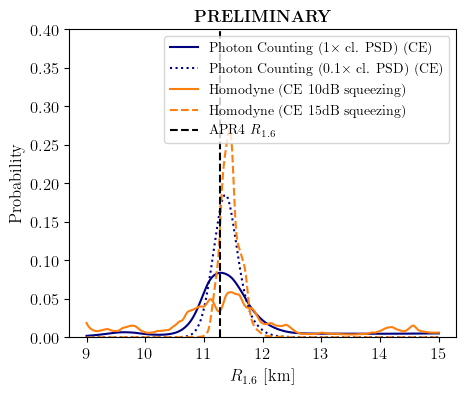

In [8]:
fig = plt.figure(figsize=(5,4))

from scipy.interpolate import interp1d

Rs = np.linspace(9,15,1000)

plt.plot(Rs, interp1d(R1d6s_interp, prob_pc, kind='linear')(Rs), color="navy", label=r'Photon Counting ($1\times$ cl. PSD) (CE)')
plt.plot(Rs, interp1d(R1d6s_interp, prob_pc_0d1, kind='linear')(Rs), color="navy", label=r'Photon Counting ($0.1\times$ cl. PSD) (CE)', ls=':')
plt.plot(Rs, interp1d(R1d6s_interp, prob_strain, kind='linear')(Rs), color="C1", label='Homodyne (CE 10dB squeezing)')
plt.plot(Rs, interp1d(R1d6s_interp, prob_strain_15db, kind='linear')(Rs), color="C1", label='Homodyne (CE 15dB squeezing)', ls='--')

plt.axvline(11.27, color='k', label=r'APR4 $R_{1.6}$', linestyle='--')

#plt.ylim(0,0.4)
#plt.xlim(10.5,12.5)
plt.ylabel(r'Probability')
plt.xlabel(r'$R_{1.6}$ [km]')

plt.legend(loc='upper right', fontsize=10, frameon=True)

plt.title(r'\textbf{PRELIMINARY}')
plt.ylim(0,0.4)
plt.savefig("hierarchical.png", bbox_inches='tight', dpi=300)

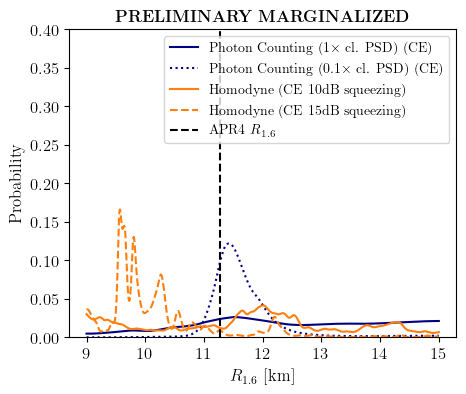

In [9]:
fig = plt.figure(figsize=(5,4))

Rs = np.linspace(9,15,1000)

plt.plot(Rs, interp1d(R1d6s_interp, prob_pc_margA, kind='linear')(Rs), color="navy", label=r'Photon Counting ($1\times$ cl. PSD) (CE)')
plt.plot(Rs, interp1d(R1d6s_interp, prob_pc_0d1_margA, kind='linear')(Rs), color="navy", label=r'Photon Counting ($0.1\times$ cl. PSD) (CE)', ls=':')
plt.plot(Rs, interp1d(R1d6s_interp, prob_strain_margA, kind='linear')(Rs), color="C1", label='Homodyne (CE 10dB squeezing)')
plt.plot(Rs, interp1d(R1d6s_interp, prob_strain_15db_margA, kind='linear')(Rs), color="C1", label='Homodyne (CE 15dB squeezing)', ls='--')

plt.axvline(11.27, color='k', label=r'APR4 $R_{1.6}$', linestyle='--')

#plt.ylim(0,0.4)
#plt.xlim(10.5,12.5)
plt.ylabel(r'Probability')
plt.xlabel(r'$R_{1.6}$ [km]')

plt.legend(loc='upper right', fontsize=10, frameon=True)

plt.title(r'\textbf{PRELIMINARY MARGINALIZED}')
plt.ylim(0,0.4)
plt.savefig("hierarchical.png", bbox_inches='tight', dpi=300)

In [10]:
logl_pc = np.cumsum(loglikelihoods,axis=0)
logl_pc -= logsumexp(logl_pc, axis=1)[:,None]
logl_pc_cumul = cumlogsumexp(logl_pc, axis=1)
logl_pc_cumul -= np.max(logl_pc_cumul, axis=1)[:, None]

logl_pc_0d1 = np.cumsum(loglikelihoods_0d1,axis=0)
logl_pc_0d1 -= logsumexp(logl_pc_0d1, axis=1)[:,None]
logl_pc_0d1_cumul = cumlogsumexp(logl_pc_0d1, axis=1)
logl_pc_0d1_cumul -= np.max(logl_pc_0d1_cumul, axis=1)[:, None]

logl_pc_margA = np.cumsum(loglikelihoods_margA,axis=0)
logl_pc_margA -= logsumexp(logl_pc_margA, axis=1)[:,None]
logl_pc_margA_cumul = cumlogsumexp(logl_pc_margA, axis=1)
logl_pc_margA_cumul -= np.max(logl_pc_margA_cumul, axis=1)[:, None]

logl_pc_0d1_margA = np.cumsum(loglikelihoods_0d1_margA,axis=0)
logl_pc_0d1_margA -= logsumexp(logl_pc_0d1_margA, axis=1)[:,None]
logl_pc_0d1_margA_cumul = cumlogsumexp(logl_pc_0d1_margA, axis=1)
logl_pc_0d1_margA_cumul -= np.max(logl_pc_0d1_margA_cumul, axis=1)[:, None]

logl_strain = np.cumsum(loglikelihoods_strain,axis=0)
logl_strain -= logsumexp(logl_strain, axis=1)[:,None]
logl_strain_cumul = cumlogsumexp(logl_strain, axis=1)
logl_strain_cumul -= np.max(logl_strain_cumul, axis=1)[:,None]

logl_strain_15db = np.cumsum(loglikelihoods_strain_15db,axis=0)
logl_strain_15db -= logsumexp(logl_strain_15db, axis=1)[:,None]
logl_strain_15db_cumul = cumlogsumexp(logl_strain_15db, axis=1)
logl_strain_15db_cumul -= np.max(logl_strain_15db_cumul, axis=1)[:,None]

logl_strain_margA = np.cumsum(loglikelihoods_strain_margA,axis=0)
logl_strain_margA -= logsumexp(logl_strain_margA, axis=1)[:,None]
logl_strain_margA_cumul = cumlogsumexp(logl_strain_margA, axis=1)
logl_strain_margA_cumul -= np.max(logl_strain_margA_cumul, axis=1)[:,None]

logl_strain_15db_margA = np.cumsum(loglikelihoods_strain_15db_margA,axis=0)
logl_strain_15db_margA -= logsumexp(logl_strain_15db_margA, axis=1)[:,None]
logl_strain_15db_margA_cumul = cumlogsumexp(logl_strain_15db_margA, axis=1)
logl_strain_15db_margA_cumul -= np.max(logl_strain_15db_margA_cumul, axis=1)[:,None]

In [11]:
### Ordering events by the snrs

sorted_indices = np.argsort(snrs)[::-1]
sorted_snrs = snrs[sorted_indices]
sorted_indices_silica = np.argsort(snrs_silica)[::-1]
sorted_snrs_silica = snrs_silica[sorted_indices_silica]

logl_pc = np.cumsum(loglikelihoods[sorted_indices_silica],axis=0)
logl_pc -= logsumexp(logl_pc, axis=1)[:,None]
logl_pc_cumul = cumlogsumexp(logl_pc, axis=1)
logl_pc_cumul -= np.max(logl_pc_cumul, axis=1)[:, None]

logl_pc_0d1 = np.cumsum(loglikelihoods_0d1[sorted_indices_silica],axis=0)
logl_pc_0d1 -= logsumexp(logl_pc_0d1, axis=1)[:,None]
logl_pc_0d1_cumul = cumlogsumexp(logl_pc_0d1, axis=1)
logl_pc_0d1_cumul -= np.max(logl_pc_0d1_cumul, axis=1)[:, None]

logl_pc_margA = np.cumsum(loglikelihoods_margA[sorted_indices_silica],axis=0)
logl_pc_margA -= logsumexp(logl_pc_margA, axis=1)[:,None]
logl_pc_margA_cumul = cumlogsumexp(logl_pc_margA, axis=1)
logl_pc_margA_cumul -= np.max(logl_pc_margA_cumul, axis=1)[:, None]

logl_pc_0d1_margA = np.cumsum(loglikelihoods_0d1_margA[sorted_indices_silica],axis=0)
logl_pc_0d1_margA -= logsumexp(logl_pc_0d1_margA, axis=1)[:,None]
logl_pc_0d1_margA_cumul = cumlogsumexp(logl_pc_0d1_margA, axis=1)
logl_pc_0d1_margA_cumul -= np.max(logl_pc_0d1_margA_cumul, axis=1)[:, None]

logl_strain = np.cumsum(loglikelihoods_strain[sorted_indices_silica],axis=0)
logl_strain -= logsumexp(logl_strain, axis=1)[:,None]
logl_strain_cumul = cumlogsumexp(logl_strain, axis=1)
logl_strain_cumul -= np.max(logl_strain_cumul, axis=1)[:,None]

logl_strain_15db = np.cumsum(loglikelihoods_strain_15db[sorted_indices_silica],axis=0)
logl_strain_15db -= logsumexp(logl_strain_15db, axis=1)[:,None]
logl_strain_15db_cumul = cumlogsumexp(logl_strain_15db, axis=1)
logl_strain_15db_cumul -= np.max(logl_strain_15db_cumul, axis=1)[:,None]

logl_strain_margA = np.cumsum(loglikelihoods_strain_margA[sorted_indices_silica],axis=0)
logl_strain_margA -= logsumexp(logl_strain_margA, axis=1)[:,None]
logl_strain_margA_cumul = cumlogsumexp(logl_strain_margA, axis=1)
logl_strain_margA_cumul -= np.max(logl_strain_margA_cumul, axis=1)[:,None]

logl_strain_15db_margA = np.cumsum(loglikelihoods_strain_15db_margA[sorted_indices_silica],axis=0)
logl_strain_15db_margA -= logsumexp(logl_strain_15db_margA, axis=1)[:,None]
logl_strain_15db_margA_cumul = cumlogsumexp(logl_strain_15db_margA, axis=1)
logl_strain_15db_margA_cumul -= np.max(logl_strain_15db_margA_cumul, axis=1)[:,None]

In [12]:
inv_snr_cdf = interp1d(np.linspace(0,Nevents-1,Nevents), (sorted_snrs_silica), kind='linear', fill_value=((np.max(sorted_snrs_silica)), (np.min(sorted_snrs_silica))), bounds_error=False)

snr_cdf = interp1d((sorted_snrs_silica), np.linspace(0,Nevents-1,Nevents), kind='linear', fill_value=(0,Nevents), bounds_error=False)

In [13]:


R1d6s_interp = np.linspace(9,15,1000)

CI_array_val_pc = np.zeros((Nevents, 1000))
CI_array_val_pc_0d1 = np.zeros((Nevents, 1000))

CI_array_val_pc_margA = np.zeros((Nevents, 1000))
CI_array_val_pc_0d1_margA = np.zeros((Nevents, 1000))

CI_array_val_strain = np.zeros((Nevents, 1000))
CI_array_val_strain_15db = np.zeros((Nevents, 1000))

CI_array_val_strain_margA = np.zeros((Nevents, 1000))
CI_array_val_strain_15db_margA = np.zeros((Nevents, 1000))

prob_pc = np.exp(logl_pc - np.max(logl_pc,axis=1)[:,None])/np.sum(np.exp(logl_pc- np.max(logl_pc,axis=1)[:,None]),axis=1)[:,None]
prob_pc_0d1 = np.exp(logl_pc_0d1 - np.max(logl_pc_0d1,axis=1)[:,None])/np.sum(np.exp(logl_pc_0d1- np.max(logl_pc_0d1,axis=1)[:,None]),axis=1)[:,None]
prob_pc_margA = np.exp(logl_pc_margA - np.max(logl_pc_margA,axis=1)[:,None])/np.sum(np.exp(logl_pc_margA- np.max(logl_pc_margA,axis=1)[:,None]),axis=1)[:,None]
prob_pc_0d1_margA = np.exp(logl_pc_0d1_margA - np.max(logl_pc_0d1_margA,axis=1)[:,None])/np.sum(np.exp(logl_pc_0d1_margA- np.max(logl_pc_0d1_margA,axis=1)[:,None]),axis=1)[:,None]

prob_strain = np.exp(logl_strain - np.max(logl_strain,axis=1)[:,None])/np.sum(np.exp(logl_strain- np.max(logl_strain,axis=1)[:,None]),axis=1)[:,None]
prob_strain_15db = np.exp(logl_strain_15db - np.max(logl_strain_15db,axis=1)[:,None])/np.sum(np.exp(logl_strain_15db- np.max(logl_strain_15db,axis=1)[:,None]),axis=1)[:,None]
prob_strain_margA = np.exp(logl_strain_margA - np.max(logl_strain_margA,axis=1)[:,None])/np.sum(np.exp(logl_strain_margA- np.max(logl_strain_margA,axis=1)[:,None]),axis=1)[:,None]
prob_strain_15db_margA = np.exp(logl_strain_15db_margA - np.max(logl_strain_15db_margA,axis=1)[:,None])/np.sum(np.exp(logl_strain_15db_margA- np.max(logl_strain_15db_margA,axis=1)[:,None]),axis=1)[:,None]

for i in tqdm(range(Nevents)):
    prob_interp = prob_pc[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_pc[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_pc[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.5]] = 1

    prob_interp = prob_pc_0d1[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_pc_0d1[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_pc_0d1[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.5]] = 1

    prob_interp = prob_pc_margA[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_pc_margA[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_pc_margA[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.5]] = 1

    prob_interp = prob_pc_0d1_margA[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_pc_0d1_margA[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_pc_0d1_margA[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.5]] = 1

    prob_interp = prob_strain[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_strain[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_strain[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.5]] = 1

    prob_interp = prob_strain_15db[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_strain_15db[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_strain_15db[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.5]] = 1

    prob_interp = prob_strain_margA[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_strain_margA[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_strain_margA[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.5]] = 1

    prob_interp = prob_strain_15db_margA[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_strain_15db_margA[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_strain_15db_margA

100%|██████████| 8608/8608 [00:06<00:00, 1338.63it/s]


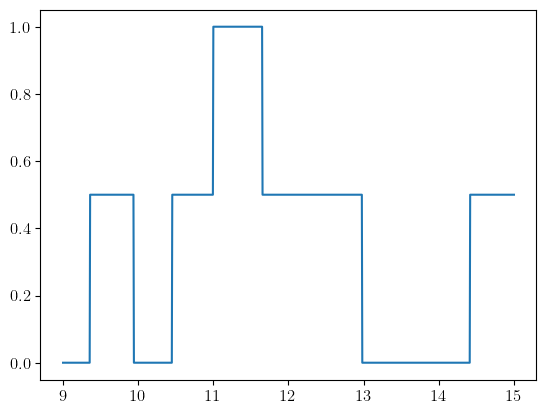

In [14]:
plt.plot(R1d6s_interp, CI_array_val_pc[-1])

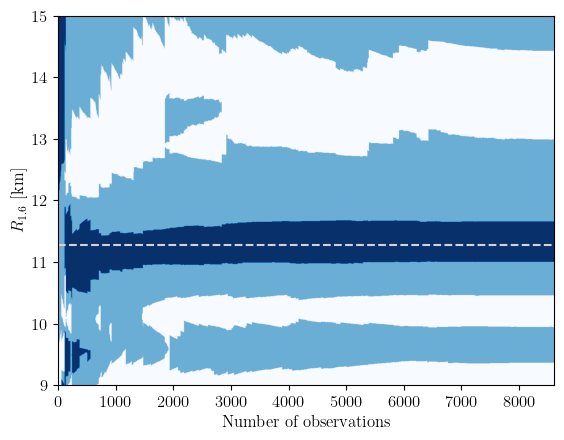

In [15]:
plt.imshow(CI_array_val_pc.T, aspect='auto', extent=(0, Nevents, 9, 15), origin='lower', cmap='Blues', vmin=0, vmax=1)
plt.xlabel('Number of observations')
plt.ylabel(r'$R_{1.6}$ [km]')
plt.axhline(11.27, color='lightgrey', label=r'APR4 $R_{1.6}$', linestyle='--')

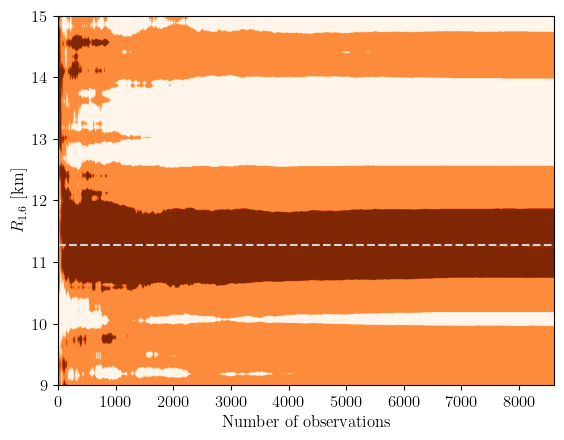

In [16]:
plt.imshow(CI_array_val_strain.T, aspect='auto', extent=(0, Nevents, 9, 15), origin='lower', cmap='Oranges', vmin=0, vmax=1)
plt.xlabel('Number of observations')
plt.ylabel(r'$R_{1.6}$ [km]')
plt.axhline(11.27, color='lightgrey', label=r'APR4 $R_{1.6}$', linestyle='--')

In [17]:
CI_array_val_pc[CI_array_val_pc < 1] = 0
CI_array_val_pc_sum = np.sum(CI_array_val_pc, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])
CI_array_val_pc_0d1[CI_array_val_pc_0d1 < 1] = 0
CI_array_val_pc_0d1_sum = np.sum(CI_array_val_pc_0d1, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])
CI_array_val_pc_no_background[CI_array_val_pc_no_background < 1] = 0
CI_array_val_pc_no_background_sum = np.sum(CI_array_val_pc_no_background, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])

CI_array_val_strain[CI_array_val_strain < 1] = 0
CI_array_val_strain_sum = np.sum(CI_array_val_strain, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])
CI_array_val_strain_15db[CI_array_val_strain_15db < 1] = 0
CI_array_val_strain_15db_sum = np.sum(CI_array_val_strain_15db, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])
CI_array_val_strain_20db[CI_array_val_strain_20db < 1] = 0
CI_array_val_strain_20db_sum = np.sum(CI_array_val_strain_20db, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])

NameError: name 'CI_array_val_pc_no_background' is not defined

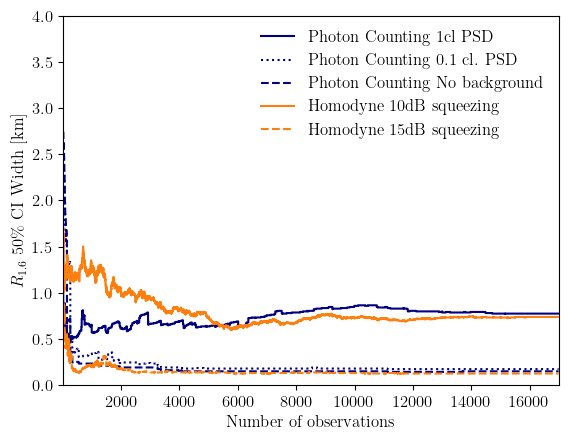

In [ ]:
plt.step(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_sum, color="navy", label='Photon Counting 1cl PSD')
plt.step(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_0d1_sum, color="navy", ls=':', label='Photon Counting 0.1 cl. PSD')
plt.step(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_no_background_sum, color="navy", ls='--', label='Photon Counting No background')

plt.step(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_strain_sum, color="C1", label='Homodyne 10dB squeezing')
plt.step(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_strain_15db_sum, color="C1", ls='--', label='Homodyne 15dB squeezing')

plt.ylabel(r'$R_{1.6}$ 50\% CI Width [km]')
plt.xlabel(r'Number of observations')
plt.xlim(1,Nevents)
plt.ylim(0,4)

#plt.plot(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_no_background_sum[-1]*np.sqrt(np.sum(sorted_snrs_silica**2))/np.sqrt(np.cumsum(sorted_snrs_silica**2)), color='k', ls='--', label=r'$\propto 1/\sqrt{\sum\rho^2}$')
#plt.plot(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_sum[-1]*np.sqrt(np.sum(sorted_snrs_silica**2))/np.sqrt(np.cumsum(sorted_snrs_silica**2)), color='k', ls='--')

plt.legend(loc='upper right', frameon=False)
#plt.xscale('log')

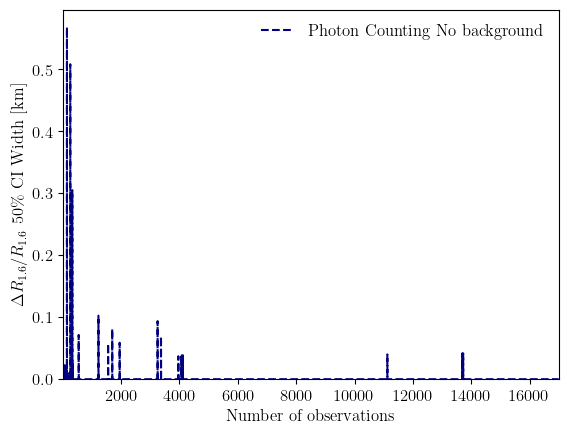

In [ ]:
#plt.step(np.linspace(0,Nevents-2,Nevents-1, dtype=int), np.abs(np.diff(CI_array_val_pc_sum))/CI_array_val_pc_sum[:-1], color="navy", label='Photon Counting 1cl PSD')
#plt.step(np.linspace(0,Nevents-2,Nevents-1, dtype=int), np.abs(np.diff(CI_array_val_pc_0d1_sum))/CI_array_val_pc_0d1_sum[:-1], color="navy", ls=':', label='Photon Counting 0.1 cl. PSD')
plt.step(np.linspace(0,Nevents-2,Nevents-1, dtype=int), np.abs(np.diff(CI_array_val_pc_no_background_sum))/CI_array_val_pc_no_background_sum[:-1], color="navy", ls='--', label='Photon Counting No background')

#plt.step(np.linspace(0,Nevents-2,Nevents-1, dtype=int), np.abs(np.diff(CI_array_val_strain_sum))/CI_array_val_strain_sum[:-1], color="C1", label='Homodyne 10dB squeezing')
#plt.step(np.linspace(0,Nevents-2,Nevents-1, dtype=int), np.abs(np.diff(CI_array_val_strain_15db_sum))/CI_array_val_strain_sum[:-1], color="C1", ls='--', label='Homodyne 15dB squeezing')

plt.ylabel(r'$\Delta R_{1.6}/R_{1.6}$ 50\% CI Width [km]')
plt.xlabel(r'Number of observations')
plt.xlim(1,Nevents)
plt.ylim(0,)

#plt.plot(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_no_background_sum[-1]*np.sqrt(np.sum(sorted_snrs_silica**2))/np.sqrt(np.cumsum(sorted_snrs_silica**2)), color='k', ls='--', label=r'$\propto 1/\sqrt{\sum\rho^2}$')
#plt.plot(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_sum[-1]*np.sqrt(np.sum(sorted_snrs_silica**2))/np.sqrt(np.cumsum(sorted_snrs_silica**2)), color='k', ls='--')

plt.legend(loc='upper right', frameon=False)
#plt.xscale('log')

In [ ]:
np.min(np.abs(np.diff(CI_array_val_strain_sum))[np.abs(np.diff(CI_array_val_strain_sum)) > 0])

0.006006006006005649

(0.0, 0.5102102102101799)

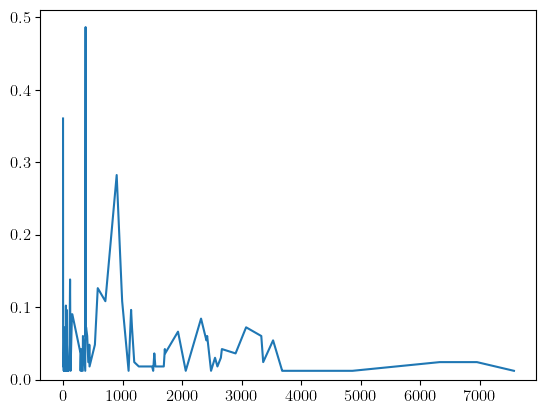

In [ ]:
plt.plot(np.linspace(0, Nevents-2, Nevents-1, dtype=int)[np.abs(np.diff(CI_array_val_pc_sum)) > 0.006006006006005649], 
         np.abs(np.diff(CI_array_val_pc_sum))[np.abs(np.diff(CI_array_val_pc_sum)) > 0.006006006006005649])
plt.ylim(0,)

In [ ]:
np.linspace(0, Nevents-2, Nevents-1, dtype=int)[np.abs(np.diff(CI_array_val_pc_sum)) > 0.006006006006005649][-1]

13644

In [ ]:
sorted_snrs_silica[8392]

0.17729878983549527

In [ ]:
sorted_snrs_silica[13644]

0.09099805551387341

In [ ]:
file_list = glob.glob("results_250519/result_CE_*.json")

nexps = []
nsigs = []

for i in tqdm(range(len(file_list[:Nevents]))):
    file = file_list[i] #f'results_250410/result_CE1CE2silica_{10900 + i}.json'
    indices.append(int(file.split("_")[-1].split(".")[0]))
    with open(file, "r") as f:
        result = json.load(f)

        nexps.append(result["n_exp"])
        nsigs.append(result["n_signal_photons"])


  0%|          | 0/5703 [00:00<?, ?it/s]

100%|██████████| 5703/5703 [00:02<00:00, 2373.56it/s]


In [ ]:
np.sum(nexps)

4.46182150635614

In [ ]:
np.sum(nsigs)

5.0

In [ ]:
np.sum(signal_photons[:7000])

3.0